In [1]:
import os, sys
sys.path.append(os.path.abspath('../'))
from utils.rl.hypervolume2d import hypervolume2d

def compute_hypervolume(df, antiutopia, utopia):
    array = df.drop('Algorithms', axis=1)
    array = array.values
    return hypervolume2d(array, antiutopia, utopia)

# Robust Dam Problem (random initial state)

In [2]:
import pandas as pd
import numpy as np
from EMAWorkbench import load_results

results_path='../results/dam_robust_performance/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'initial-24-06-2022-23-47_0.tar.gz',
 'initial-24-06-2022-23-47_1.tar.gz',
 'initial-24-06-2022-23-47_10.tar.gz',
 'initial-24-06-2022-23-47_11.tar.gz',
 'initial-24-06-2022-23-47_12.tar.gz',
 'initial-24-06-2022-23-47_2.tar.gz',
 'initial-24-06-2022-23-47_3.tar.gz',
 'initial-24-06-2022-23-47_4.tar.gz',
 'initial-24-06-2022-23-47_5.tar.gz',
 'initial-24-06-2022-23-47_6.tar.gz',
 'initial-24-06-2022-23-47_7.tar.gz',
 'initial-24-06-2022-23-47_8.tar.gz',
 'initial-24-06-2022-23-47_9.tar.gz',
 'initial_avg-24-06-2022-23-50_0.tar.gz',
 'initial_avg-24-06-2022-23-50_1.tar.gz',
 'initial_avg-24-06-2022-23-50_10.tar.gz',
 'initial_avg-24-06-2022-23-50_11.tar.gz',
 'initial_avg-24-06-2022-23-50_12.tar.gz',
 'initial_avg-24-06-2022-23-50_13.tar.gz',
 'initial_avg-24-06-2022-23-50_14.tar.gz',
 'initial_avg-24-06-2022-23-50_15.tar.gz',
 'initial_avg-24-06-2022-23-50_16.tar.gz',
 'initial_avg-24-06-2022-23-50_17.tar.gz',
 'initial_avg-24-06-2022-23-50_18.tar.gz',
 'initial_avg-24-0

In [3]:
ea=[]
for i in range(1, 14):
    _, all_outcomes=load_results(results_path + files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea.append(all_outcomes)
    print(files[i])
ea=pd.DataFrame(ea)
ea["Algorithms"]="Epsilon-NSGA-II"
ea

initial-24-06-2022-23-47_0.tar.gz
initial-24-06-2022-23-47_1.tar.gz
initial-24-06-2022-23-47_10.tar.gz
initial-24-06-2022-23-47_11.tar.gz
initial-24-06-2022-23-47_12.tar.gz
initial-24-06-2022-23-47_2.tar.gz
initial-24-06-2022-23-47_3.tar.gz
initial-24-06-2022-23-47_4.tar.gz
initial-24-06-2022-23-47_5.tar.gz
initial-24-06-2022-23-47_6.tar.gz
initial-24-06-2022-23-47_7.tar.gz
initial-24-06-2022-23-47_8.tar.gz
initial-24-06-2022-23-47_9.tar.gz


,utility,reliability,Algorithms
0,-2.568756,-9.306250,Epsilon-NSGA-II
1,-2.418755,-9.331250,Epsilon-NSGA-II
2,-3.806257,-9.200000,Epsilon-NSGA-II
3,-3.956258,-9.037500,Epsilon-NSGA-II
4,-3.212507,-9.206250,Epsilon-NSGA-II
5,-2.025005,-9.337500,Epsilon-NSGA-II
6,-1.431253,-9.531250,Epsilon-NSGA-II
7,-3.062506,-9.231250,Epsilon-NSGA-II
8,-1.581254,-9.437500,Epsilon-NSGA-II
9,-1.087502,-9.700000,Epsilon-NSGA-II


In [4]:
path = files[55]
nes = pd.read_csv(results_path + path)
nes["Algorithms"]="MO-NES"
print(path)
nes

nes_initial-27-06-2022-18-52_high.csv


,utility,reliability,Algorithms
0,-0.844870,-9.557951,MO-NES
1,-1.446330,-9.363422,MO-NES
2,-4.020934,-8.956702,MO-NES
3,-3.979565,-8.961309,MO-NES
4,-2.004413,-9.265149,MO-NES
...,...,...,...
86,-2.279717,-9.204049,MO-NES
87,-4.025008,-8.956249,MO-NES
88,-2.513980,-9.159549,MO-NES
89,-0.681538,-9.602111,MO-NES


In [5]:
path = files[58]
repsep = pd.read_csv(results_path + path)
repsep["Algorithms"]="MO-eREPS"
print(path)
repsep

repsep_initial-27-06-2022-18-56_best.csv


,utility,reliability,Algorithms
0,-0.633870,-9.636660,MO-eREPS
1,-0.636610,-9.634247,MO-eREPS
2,-1.460754,-9.359813,MO-eREPS
3,-3.288026,-9.050111,MO-eREPS
4,-1.782504,-9.296343,MO-eREPS
...,...,...,...
503,-2.647489,-9.155648,MO-eREPS
504,-3.985827,-8.960678,MO-eREPS
505,-2.633228,-9.158698,MO-eREPS
506,-0.662414,-9.615672,MO-eREPS


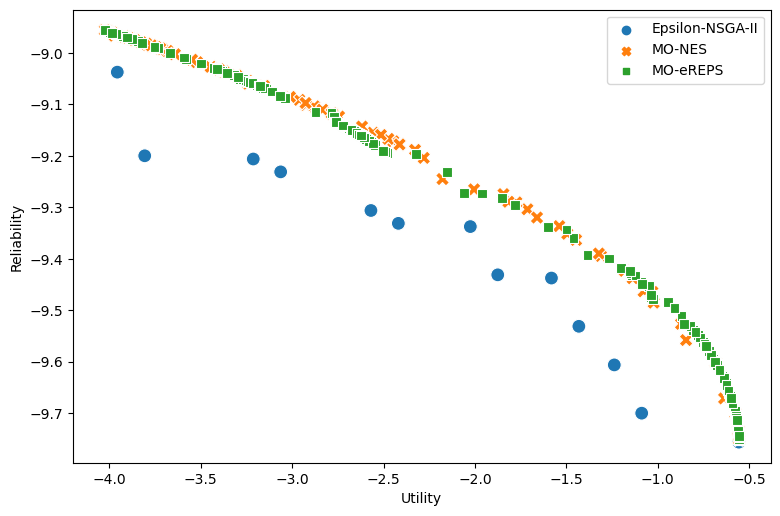

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

In [7]:
ea_avg=[]
for i in range(14, 54):
    _, all_outcomes=load_results(results_path + files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea_avg.append(all_outcomes)
    print(files[i])
ea_avg=pd.DataFrame(ea_avg)
ea_avg["Algorithms"]="Epsilon-NSGA-II_avg"
ea_avg
# 0:04:06

initial_avg-24-06-2022-23-50_0.tar.gz
initial_avg-24-06-2022-23-50_1.tar.gz
initial_avg-24-06-2022-23-50_10.tar.gz
initial_avg-24-06-2022-23-50_11.tar.gz
initial_avg-24-06-2022-23-50_12.tar.gz
initial_avg-24-06-2022-23-50_13.tar.gz
initial_avg-24-06-2022-23-50_14.tar.gz
initial_avg-24-06-2022-23-50_15.tar.gz
initial_avg-24-06-2022-23-50_16.tar.gz
initial_avg-24-06-2022-23-50_17.tar.gz
initial_avg-24-06-2022-23-50_18.tar.gz
initial_avg-24-06-2022-23-50_19.tar.gz
initial_avg-24-06-2022-23-50_2.tar.gz
initial_avg-24-06-2022-23-50_20.tar.gz
initial_avg-24-06-2022-23-50_21.tar.gz
initial_avg-24-06-2022-23-50_22.tar.gz
initial_avg-24-06-2022-23-50_23.tar.gz
initial_avg-24-06-2022-23-50_24.tar.gz
initial_avg-24-06-2022-23-50_25.tar.gz
initial_avg-24-06-2022-23-50_26.tar.gz
initial_avg-24-06-2022-23-50_27.tar.gz
initial_avg-24-06-2022-23-50_28.tar.gz
initial_avg-24-06-2022-23-50_29.tar.gz
initial_avg-24-06-2022-23-50_3.tar.gz
initial_avg-24-06-2022-23-50_30.tar.gz
initial_avg-24-06-2022-23-50_

,utility,reliability,Algorithms
0,-0.631263,-9.687495,Epsilon-NSGA-II_avg
1,-0.743768,-9.631246,Epsilon-NSGA-II_avg
2,-2.987515,-9.099998,Epsilon-NSGA-II_avg
3,-2.637506,-9.156249,Epsilon-NSGA-II_avg
4,-1.375033,-9.399994,Epsilon-NSGA-II_avg
5,-0.587513,-9.699996,Epsilon-NSGA-II_avg
6,-3.281257,-9.056249,Epsilon-NSGA-II_avg
7,-0.968773,-9.549995,Epsilon-NSGA-II_avg
8,-0.837521,-9.593746,Epsilon-NSGA-II_avg
9,-0.787517,-9.618744,Epsilon-NSGA-II_avg


In [8]:
path = files[56]
nes_avg = pd.read_csv(results_path + path)
nes_avg["Algorithms"]="MO-NES_avg"
print(path)
nes_avg
# 0:00:15

nes_initial_avg-28-06-2022-15-36_best.csv


,utility,reliability,Algorithms
0,-2.230084,-9.205445,MO-NES_avg
1,-3.708935,-8.992903,MO-NES_avg
2,-3.274180,-9.048072,MO-NES_avg
3,-2.446934,-9.170445,MO-NES_avg
4,-1.363471,-9.373445,MO-NES_avg
...,...,...,...
1009,-2.546911,-9.154845,MO-NES_avg
1010,-3.252492,-9.050936,MO-NES_avg
1011,-3.193210,-9.058872,MO-NES_avg
1012,-4.025008,-8.956249,MO-NES_avg


In [9]:
path = files[60]
repsep_avg = pd.read_csv(results_path + path)
repsep_avg["Algorithms"]="MO-eREPS_avg"
print(path)
repsep_avg
# 0:00:15

repsep_initial_avg-28-06-2022-15-28_best.csv


,utility,reliability,Algorithms
0,-1.322455,-9.383994,MO-eREPS_avg
1,-0.910312,-9.494744,MO-eREPS_avg
2,-2.137151,-9.220244,MO-eREPS_avg
3,-4.005900,-8.958497,MO-eREPS_avg
4,-0.815719,-9.531726,MO-eREPS_avg
...,...,...,...
1152,-0.865629,-9.511244,MO-eREPS_avg
1153,-0.822510,-9.528244,MO-eREPS_avg
1154,-3.109330,-9.070187,MO-eREPS_avg
1155,-0.569550,-9.711049,MO-eREPS_avg


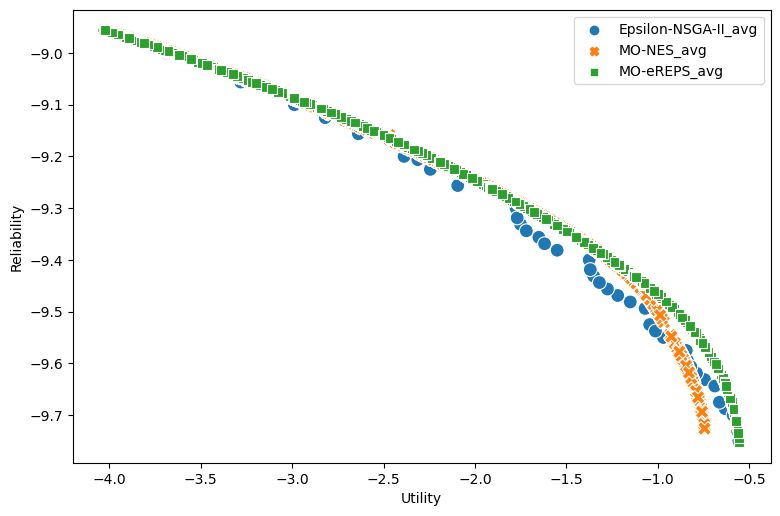

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea_avg, nes_avg, repsep_avg])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

In [11]:
compute_hypervolume(ea, np.array([-4.5, -10.5]), np.array([0, -8.5]))

0.4974640560262284

In [12]:
compute_hypervolume(ea_avg, np.array([-4.5, -10.5]), np.array([0, -8.5]))

0.5565699334135664

In [13]:
compute_hypervolume(repsep_avg, np.array([-4.5, -10.5]), np.array([0, -8.5]))

0.5729951795693837

In [15]:
compute_hypervolume(nes_avg, np.array([-4.5, -10.5]), np.array([0, -8.5]))

0.5520730057209008

# Robust Dam Problem (deep)

In [35]:
import os, sys
sys.path.append(os.path.abspath('../'))
import pandas as pd
import numpy as np
from EMAWorkbench import load_results

results_path='../results/dam_deep_performance/'
files=sorted(os.listdir(results_path))
files

['.DS_Store',
 'ea-26-06-2022-15-11_0.tar.gz',
 'ea-26-06-2022-15-11_1.tar.gz',
 'ea-26-06-2022-15-11_10.tar.gz',
 'ea-26-06-2022-15-11_11.tar.gz',
 'ea-26-06-2022-15-11_12.tar.gz',
 'ea-26-06-2022-15-11_13.tar.gz',
 'ea-26-06-2022-15-11_14.tar.gz',
 'ea-26-06-2022-15-11_15.tar.gz',
 'ea-26-06-2022-15-11_16.tar.gz',
 'ea-26-06-2022-15-11_17.tar.gz',
 'ea-26-06-2022-15-11_18.tar.gz',
 'ea-26-06-2022-15-11_19.tar.gz',
 'ea-26-06-2022-15-11_2.tar.gz',
 'ea-26-06-2022-15-11_20.tar.gz',
 'ea-26-06-2022-15-11_21.tar.gz',
 'ea-26-06-2022-15-11_22.tar.gz',
 'ea-26-06-2022-15-11_23.tar.gz',
 'ea-26-06-2022-15-11_24.tar.gz',
 'ea-26-06-2022-15-11_25.tar.gz',
 'ea-26-06-2022-15-11_3.tar.gz',
 'ea-26-06-2022-15-11_4.tar.gz',
 'ea-26-06-2022-15-11_5.tar.gz',
 'ea-26-06-2022-15-11_6.tar.gz',
 'ea-26-06-2022-15-11_7.tar.gz',
 'ea-26-06-2022-15-11_8.tar.gz',
 'ea-26-06-2022-15-11_9.tar.gz',
 'ea_avg-27-06-2022-13-11_0.tar.gz',
 'ea_avg-27-06-2022-13-11_1.tar.gz',
 'ea_avg-27-06-2022-13-11_10.tar.gz',


In [36]:
ea=[]
for i in range(1, 27):
    _, all_outcomes=load_results(results_path + files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea.append(all_outcomes)
    print(files[i])
ea=pd.DataFrame(ea)
ea["Algorithms"]="Epsilon-NSGA-II"
ea
# 2:44:18

ea-26-06-2022-15-11_0.tar.gz
ea-26-06-2022-15-11_1.tar.gz
ea-26-06-2022-15-11_10.tar.gz
ea-26-06-2022-15-11_11.tar.gz
ea-26-06-2022-15-11_12.tar.gz
ea-26-06-2022-15-11_13.tar.gz
ea-26-06-2022-15-11_14.tar.gz
ea-26-06-2022-15-11_15.tar.gz
ea-26-06-2022-15-11_16.tar.gz
ea-26-06-2022-15-11_17.tar.gz
ea-26-06-2022-15-11_18.tar.gz
ea-26-06-2022-15-11_19.tar.gz
ea-26-06-2022-15-11_2.tar.gz
ea-26-06-2022-15-11_20.tar.gz
ea-26-06-2022-15-11_21.tar.gz
ea-26-06-2022-15-11_22.tar.gz
ea-26-06-2022-15-11_23.tar.gz
ea-26-06-2022-15-11_24.tar.gz
ea-26-06-2022-15-11_25.tar.gz
ea-26-06-2022-15-11_3.tar.gz
ea-26-06-2022-15-11_4.tar.gz
ea-26-06-2022-15-11_5.tar.gz
ea-26-06-2022-15-11_6.tar.gz
ea-26-06-2022-15-11_7.tar.gz
ea-26-06-2022-15-11_8.tar.gz
ea-26-06-2022-15-11_9.tar.gz


,utility,reliability,Algorithms
0,-3.855989,-9.768025,Epsilon-NSGA-II
1,-2.228186,-10.271962,Epsilon-NSGA-II
2,-1.559144,-10.327880,Epsilon-NSGA-II
3,-1.529102,-10.348104,Epsilon-NSGA-II
4,-1.532514,-10.317068,Epsilon-NSGA-II
5,-1.530930,-10.305428,Epsilon-NSGA-II
6,-1.534795,-10.355391,Epsilon-NSGA-II
7,-1.538568,-10.331624,Epsilon-NSGA-II
8,-3.485206,-9.898285,Epsilon-NSGA-II
9,-2.185315,-10.233152,Epsilon-NSGA-II


In [37]:
path = files[70]
nes = pd.read_csv(results_path + path)
nes["Algorithms"]="MO-NES"
print(path)
nes

nes-26-06-2022-21-19_best.csv


,utility,reliability,Algorithms
0,-2.114117,-9.602246,MO-NES
1,-5.636447,-8.924484,MO-NES
2,-5.579895,-8.926726,MO-NES
3,-1.725652,-10.082747,MO-NES
4,-4.920148,-9.005466,MO-NES
...,...,...,...
132,-1.849066,-9.871985,MO-NES
133,-2.198548,-9.532786,MO-NES
134,-3.720203,-9.195905,MO-NES
135,-1.889634,-9.808373,MO-NES


In [38]:
path = files[75]
repsep = pd.read_csv(results_path + path)
repsep["Algorithms"]="MO-eREPS"
print(path)
repsep

repsep-26-06-2022-21-28_high.csv


,utility,reliability,Algorithms
0,-3.344331,-9.252391,MO-eREPS
1,-2.230676,-9.551368,MO-eREPS
2,-2.525559,-9.409162,MO-eREPS
3,-1.682565,-9.913501,MO-eREPS
4,-1.562144,-10.075878,MO-eREPS
...,...,...,...
98,-1.378753,-10.597264,MO-eREPS
99,-2.044923,-9.616311,MO-eREPS
100,-4.744559,-9.021783,MO-eREPS
101,-1.383830,-10.575019,MO-eREPS


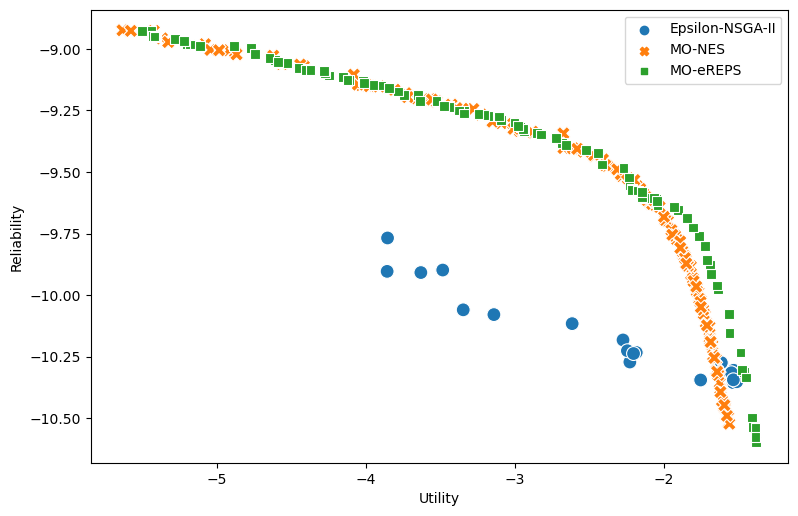

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea, nes, repsep])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()

In [40]:
ea_avg=[]
for i in range(27, 70):
    _, all_outcomes=load_results(results_path + files[i])
    all_outcomes=dict((k, np.mean(all_outcomes[k])) for k in ('utility', 'reliability'))
    ea_avg.append(all_outcomes)
    print(files[i])
ea_avg=pd.DataFrame(ea_avg)
ea_avg["Algorithms"]="Epsilon-NSGA-II_avg"
ea_avg
# 2:49:00

ea_avg-27-06-2022-13-11_0.tar.gz
ea_avg-27-06-2022-13-11_1.tar.gz
ea_avg-27-06-2022-13-11_10.tar.gz
ea_avg-27-06-2022-13-11_11.tar.gz
ea_avg-27-06-2022-13-11_12.tar.gz
ea_avg-27-06-2022-13-11_13.tar.gz
ea_avg-27-06-2022-13-11_14.tar.gz
ea_avg-27-06-2022-13-11_15.tar.gz
ea_avg-27-06-2022-13-11_16.tar.gz
ea_avg-27-06-2022-13-11_17.tar.gz
ea_avg-27-06-2022-13-11_18.tar.gz
ea_avg-27-06-2022-13-11_19.tar.gz
ea_avg-27-06-2022-13-11_2.tar.gz
ea_avg-27-06-2022-13-11_20.tar.gz
ea_avg-27-06-2022-13-11_21.tar.gz
ea_avg-27-06-2022-13-11_22.tar.gz
ea_avg-27-06-2022-13-11_23.tar.gz
ea_avg-27-06-2022-13-11_24.tar.gz
ea_avg-27-06-2022-13-11_25.tar.gz
ea_avg-27-06-2022-13-11_26.tar.gz
ea_avg-27-06-2022-13-11_27.tar.gz
ea_avg-27-06-2022-13-11_28.tar.gz
ea_avg-27-06-2022-13-11_29.tar.gz
ea_avg-27-06-2022-13-11_3.tar.gz
ea_avg-27-06-2022-13-11_30.tar.gz
ea_avg-27-06-2022-13-11_31.tar.gz
ea_avg-27-06-2022-13-11_32.tar.gz
ea_avg-27-06-2022-13-11_33.tar.gz
ea_avg-27-06-2022-13-11_34.tar.gz
ea_avg-27-06-2022-

,utility,reliability,Algorithms
0,-2.040153,-10.071143,Epsilon-NSGA-II_avg
1,-2.300075,-10.038083,Epsilon-NSGA-II_avg
2,-2.607248,-9.841126,Epsilon-NSGA-II_avg
3,-2.350266,-9.983253,Epsilon-NSGA-II_avg
4,-1.797030,-10.067746,Epsilon-NSGA-II_avg
5,-1.510832,-10.283466,Epsilon-NSGA-II_avg
6,-4.279376,-9.572393,Epsilon-NSGA-II_avg
7,-1.575696,-10.272644,Epsilon-NSGA-II_avg
8,-1.810776,-10.077220,Epsilon-NSGA-II_avg
9,-1.514583,-10.311756,Epsilon-NSGA-II_avg


In [41]:
path = files[73]
nes_avg = pd.read_csv(results_path + path)
nes_avg["Algorithms"]="MO-NES_avg"
print(path)
nes_avg
# 0:03:17

nes_avg-26-06-2022-21-34_high.csv


,utility,reliability,Algorithms
0,-1.684217,-9.862206,MO-NES_avg
1,-3.853948,-9.169855,MO-NES_avg
2,-1.447906,-10.377448,MO-NES_avg
3,-3.068423,-9.296525,MO-NES_avg
4,-3.544840,-9.214135,MO-NES_avg
...,...,...,...
133,-1.899343,-9.657037,MO-NES_avg
134,-1.459792,-10.369596,MO-NES_avg
135,-4.495076,-9.077563,MO-NES_avg
136,-3.801684,-9.184495,MO-NES_avg


In [42]:
path = files[76]
repsep_avg = pd.read_csv(results_path + path)
repsep_avg["Algorithms"]="MO-eREPS_avg"
print(path)
repsep_avg
# 0:02:30

repsep_avg-26-06-2022-21-37_best.csv


,utility,reliability,Algorithms
0,-1.986744,-9.595112,MO-eREPS_avg
1,-1.408499,-10.463109,MO-eREPS_avg
2,-1.378838,-10.570946,MO-eREPS_avg
3,-3.175258,-9.286295,MO-eREPS_avg
4,-4.851829,-9.035591,MO-eREPS_avg
...,...,...,...
118,-3.064777,-9.313425,MO-eREPS_avg
119,-2.778933,-9.351832,MO-eREPS_avg
120,-1.546712,-10.096207,MO-eREPS_avg
121,-4.880537,-9.026098,MO-eREPS_avg


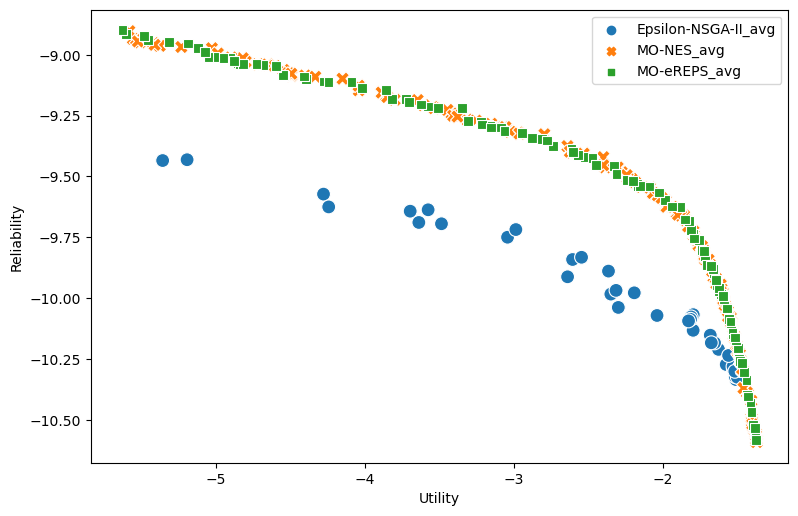

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.concat([ea_avg, nes_avg, repsep_avg])
plt.figure(figsize=(9,6), dpi= 100)
sns.scatterplot(data=data, x="utility", y="reliability", hue="Algorithms", style="Algorithms", s=100)
plt.xlabel("Utility")
plt.ylabel("Reliability")
plt.legend()
plt.show()